# Import libraries

In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset in python

In [474]:
data =pd.read_csv(r'C:\Users\ZED\Desktop\varsha\titanic_dataset.csv')

In [475]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [476]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Set PassengerId as Index

In [477]:
data = data.set_index('PassengerId')

In [478]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check basic informations

In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [480]:
data.shape

(891, 11)

In [481]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# checking how many null values in the dataset

In [482]:
 data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Null values fill with 0

In [484]:
data[['Age','Cabin','Embarked']] =  data[['Age','Cabin','Embarked']].fillna(0)

In [485]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle Outliers in Fare column

In [383]:
Q1 = np.percentile(data['Fare'],25)

In [384]:
Q1

7.9104

In [385]:
Q2 = np.percentile(data['Fare'],50)

In [386]:
Q2

14.4542

In [387]:
Q3 = np.percentile(data['Fare'],100)

In [388]:
Q3

512.3292

In [389]:
IQR = Q3 - Q1

In [390]:
IQR

504.41880000000003

In [391]:
low_limit = Q1 -1.5*IQR
upr_lim =Q3+1.5*IQR

In [392]:
low_limit

-748.7178000000001

In [393]:
upr_lim

1268.9574000000002

In [394]:
outlier = []
for x in data['Fare']:
    if((x>upr_lim)or(x<low_limit)):
        outlier.append(x)

In [395]:
outlier

[]

In [396]:
ind = data['Fare']>upr_lim
data.loc[ind].index

Int64Index([], dtype='int64', name='PassengerId')

Text(0.5, 1.0, 'Boxplot for Fare')

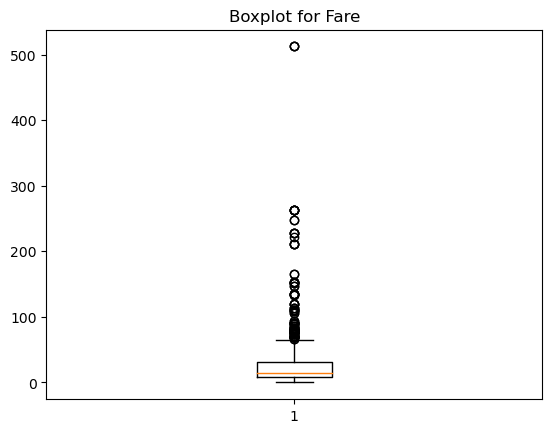

In [397]:
plt.boxplot( data['Fare'])
plt.title('Boxplot for Fare')

# Check and handle Outliers in Age column

In [398]:
Q1 = np.percentile(data['Age'],25)

In [399]:
Q1

6.0

In [400]:
Q2 = np.percentile(data['Age'],50)

In [401]:
Q2

24.0

In [402]:
Q3 = np.percentile(data['Age'],100)

In [403]:
Q3

80.0

In [404]:
IQR = Q3 - Q1

In [405]:
IQR

74.0

In [406]:
low_limit = Q1 -1.5*IQR
upr_lim =Q3+1.5*IQR

In [407]:
low_limit

-105.0

In [408]:
upr_lim

191.0

In [409]:
outlier = []
for x in data['Age']:
    if((x>upr_lim)or(x<low_limit)):
        outlier.append(x)

In [410]:
outlier

[]

In [411]:
ind = data['Age']>upr_lim
data.loc[ind].index

Int64Index([], dtype='int64', name='PassengerId')

Text(0.5, 1.0, 'Boxplot for Age')

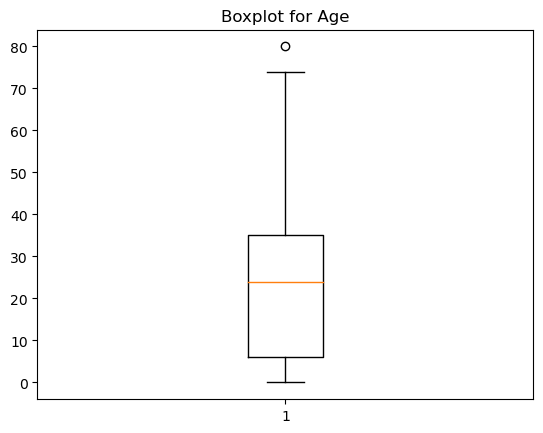

In [412]:
plt.boxplot( data['Age'])
plt.title('Boxplot for Age')

# Doing minmax scaling

In [451]:
x = data.drop('Fare',axis = 1)

In [452]:
y =data['Fare']

In [453]:
x

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,0,S


In [454]:
y

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [455]:
x = x.drop('Name', axis = 1)

In [456]:
 x = x.drop('Sex',axis = 1)

In [457]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Survived'] = label_encoder.fit_transform(x['Survived'])

In [458]:
x

,Survived,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
PassengerId,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,0,S
2,1,1,38.0,1,0,PC 17599,C85,C
3,1,3,26.0,0,0,STON/O2. 3101282,0,S
4,1,1,35.0,1,0,113803,C123,S
5,0,3,35.0,0,0,373450,0,S
...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,211536,0,S
888,1,1,19.0,0,0,112053,B42,S
889,0,3,0.0,1,2,W./C. 6607,0,S


In [459]:
x = x.drop('Cabin',axis = 1)
x = x.drop('Embarked', axis = 1)
x = x.drop('Ticket', axis = 1)

In [460]:
x1

,0,1,2,3,4,5,6
0,0.014151,1.0,0.0,0.4750,0.125,0.000000,0.139136
1,0.139136,1.0,1.0,0.3250,0.000,0.000000,0.015469
2,0.015469,1.0,0.0,0.4375,0.125,0.000000,0.103644
3,0.103644,0.0,1.0,0.4375,0.000,0.000000,0.015713
4,0.015713,0.0,1.0,0.0000,0.000,0.000000,0.016510
...,...,...,...,...,...,...,...
887,0.058556,0.0,1.0,0.0000,0.125,0.333333,0.045771
888,0.045771,1.0,0.0,0.3250,0.000,0.000000,0.058556
889,0.058556,0.0,1.0,0.4000,0.000,0.000000,0.015127
890,0.015127,NaN,NaN,NaN,NaN,NaN,NaN


In [461]:
from sklearn.preprocessing import MinMaxScaler
min_max =  MinMaxScaler(feature_range = (0,1))
x1 = min_max.fit_transform(x)

In [462]:
type(x1)

numpy.ndarray

In [463]:
x1 = pd.DataFrame(x1)

In [464]:
type(x1)

pandas.core.frame.DataFrame

In [465]:
x1

,0,1,2,3,4
0,0.0,1.0,0.2750,0.125,0.000000
1,1.0,0.0,0.4750,0.125,0.000000
2,1.0,1.0,0.3250,0.000,0.000000
3,1.0,0.0,0.4375,0.125,0.000000
4,0.0,1.0,0.4375,0.000,0.000000
...,...,...,...,...,...
886,0.0,0.5,0.3375,0.000,0.000000
887,1.0,0.0,0.2375,0.000,0.000000
888,0.0,1.0,0.0000,0.125,0.333333
889,1.0,0.0,0.3250,0.000,0.000000


In [466]:
x.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')

In [467]:
x = x.drop(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], axis =1)

In [468]:
x=pd.concat([x,x1],axis =1)

In [469]:
x.columns = [ 'Survived', 'Pclass',  'Age', 'SibSp',
       'Parch']

In [470]:
x.head()

,Survived,Pclass,Age,SibSp,Parch
1,1.0,0.0,0.4750,0.125,0.0
2,1.0,1.0,0.3250,0.000,0.0
3,1.0,0.0,0.4375,0.125,0.0
4,0.0,1.0,0.4375,0.000,0.0
5,0.0,1.0,0.0000,0.000,0.0
